## Support Vector Machine 6.28 & 6.29

In [5]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
X = np.array([[1,4],[2,5],[3,5], [3,4], [6,1], [4,0], [5,2], [5,1]])
y = np.array([1,1,1,1,-1,-1,-1,-1])
df = pd.concat([pd.DataFrame(data=X, columns=['x1', 'x2']), pd.Series(y, name='y')], axis=1)
df

,x1,x2,y
0,1,4,1
1,2,5,1
2,3,5,1
3,3,4,1
4,6,1,-1
5,4,0,-1
6,5,2,-1
7,5,1,-1


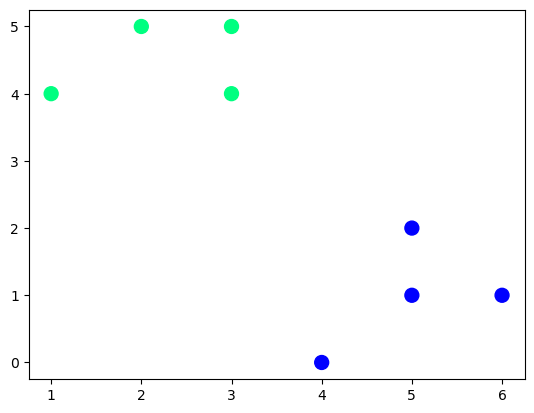

In [4]:
plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap='winter')

In [6]:
model = SVC(kernel='linear', C=1)

In [7]:
model.fit(X,y)

SVC(C=1, kernel='linear')

In [8]:
model.support_vectors_ #SUPPRT VECTORS model has identified

array([[5., 2.],
       [3., 4.]])

In [9]:
model.support_ #INDICES of identified support vectors

array([6, 3])

In [10]:
model.n_support_ #No of the support vectors in each class

array([1, 1])

In [14]:
w= model.coef_[0]
b = model.intercept_[0]
print("Weights:",w)
print("Bias:",b)

Weights: [-0.5  0.5]
Bias: 0.5


In [15]:
A = w[0]
B = w[1]
C = b

m = -A/B
c = -C/B

print("Slope: ", m)
print("Y-Intercet: ", c)

Slope:  0.9999999999999998
Y-Intercet:  -0.9999999999999998


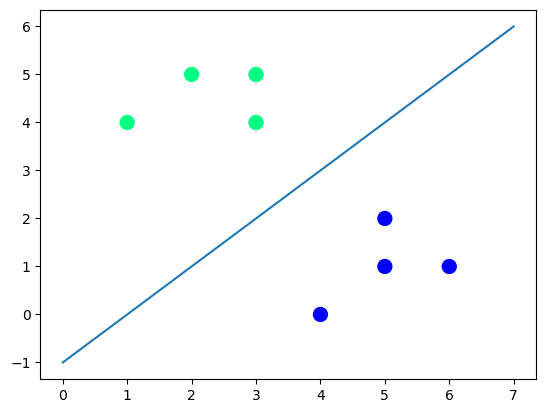

In [16]:
xx = np.linspace(0,7,50)
yy = m * xx + c
plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap='winter')
plt.plot(xx, yy)

In [17]:
point1 = [2,3]
point2 = [4,1]
print(f'Point {point1} belong to class: {model.predict([point1])[0]}')
print(f'Point {point2} belong to class: {model.predict([point2])[0]}')

Point [2, 3] belong to class: 1
Point [4, 1] belong to class: -1


# 6.29

In [2]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

### Perfectly linearly separable dataset

Shape of X array:  (50, 2)
Shape of y array:  (50,)


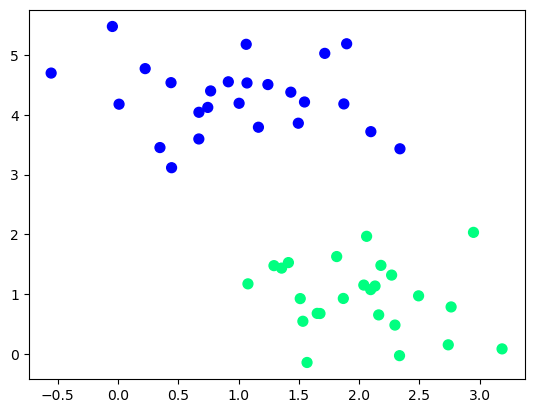

In [4]:
X , y  = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:,1], c=y, s=50, cmap='winter')
print("Shape of X array: ",X.shape)
print("Shape of y array: ",y.shape)

### Model Instance

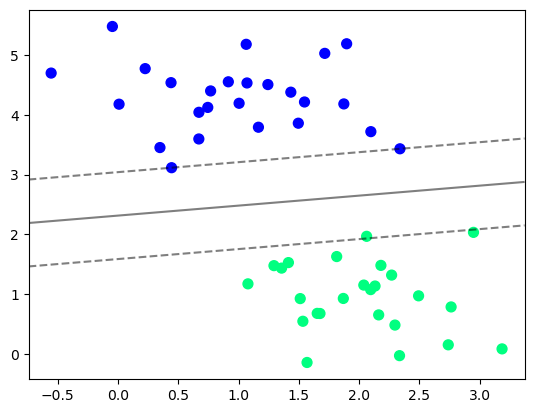

In [5]:
model = SVC(kernel='linear', C=1)
model.fit(X,y)
plt.scatter(X[:, 0], X[:,1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model)

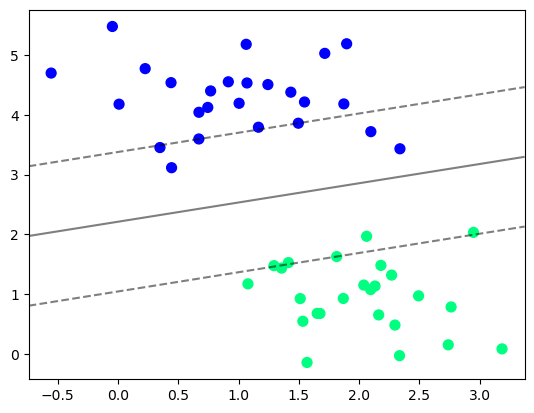

In [7]:
model = SVC(kernel='linear', C=0.1)# smaller value of C causes maximizing the margin
model.fit(X,y)
plt.scatter(X[:, 0], X[:,1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model)

## Almost Linearly Separable dataset

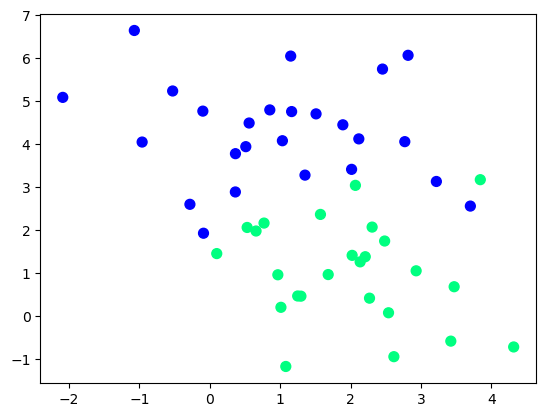

In [8]:
X , y  = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.2, random_state=0)
plt.scatter(X[:, 0], X[:,1], c=y, s=50, cmap='winter')

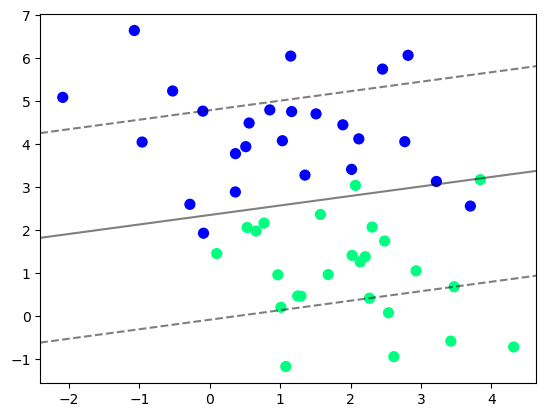

In [9]:
model = SVC(kernel='linear', C=0.01)
#Very small value of C causes maximizing the margin and ignore reducing Classification Error
model.fit(X,y)
plt.scatter(X[:, 0], X[:,1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model)

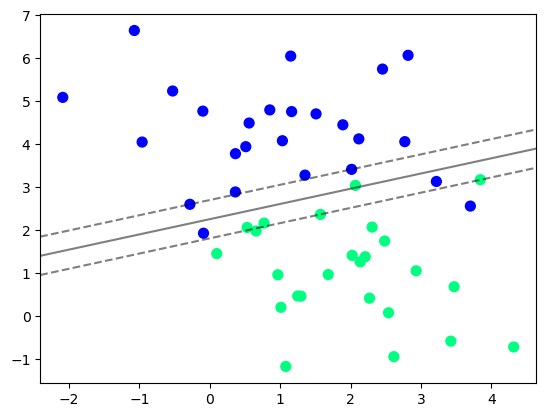

In [10]:
model = SVC(kernel='linear', C=100)
#Very lare value of C causes minimizing the margin and focuses on reducing Classification Error
model.fit(X,y)
plt.scatter(X[:, 0], X[:,1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model)

### Not Linearly Separable Dataset

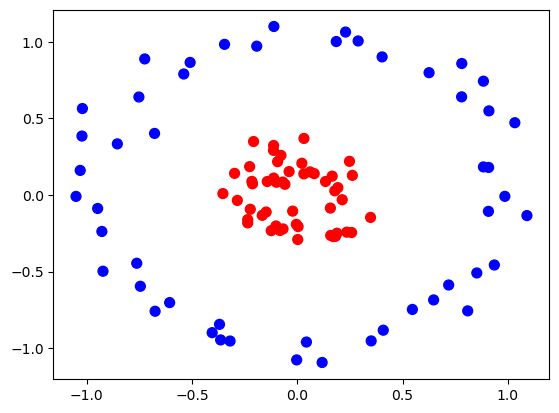

In [11]:
X, y = datasets.make_circles(100, factor=0.2, noise=0.1)
plt.scatter(X[:, 0], X[:,1], c=y, s=50, cmap='bwr')

## SVC Kernels

### Linear Kernel

,x1,x2,y
0,-0.070628,-0.955298,0
1,-0.114435,0.077069,1
2,0.952296,-0.381005,0
3,0.008264,-0.468202,1
4,-0.281060,-0.051566,1
...,...,...,...
95,-0.026076,0.559787,1
96,-0.879248,0.209111,0
97,-0.292361,1.111181,0
98,0.853666,0.575727,0


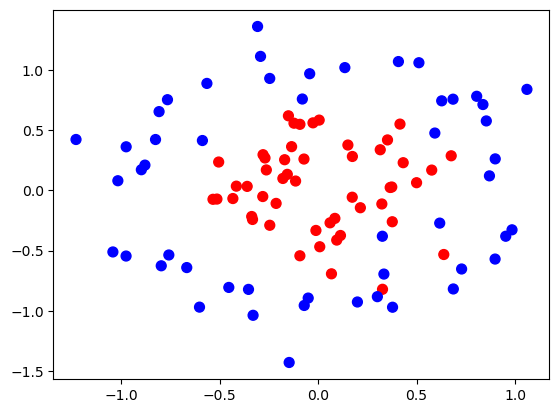

In [6]:
X, y = datasets.make_circles(100, factor=0.4, noise=0.2, random_state=54)
plt.scatter(X[:, 0], X[:,1], c=y, s=50, cmap='bwr')
df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], y=y))
df

## 1. Linear

Accurracy:  0.58
F1 Score:  0.631578947368421


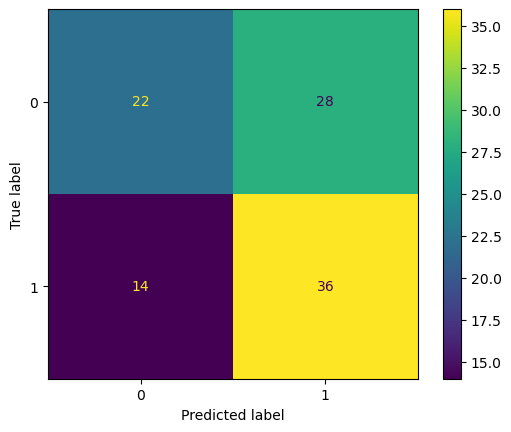

In [4]:
model = SVC(kernel='linear')
model.fit(X,y)
y_pred = model.predict(X)
print("Accurracy: ", accuracy_score(y, y_pred))
print("F1 Score: ", f1_score(y, y_pred))
ConfusionMatrixDisplay.from_predictions(y, y_pred)

## 2.Polynomial

Accurracy:  0.93
F1 Score:  0.9320388349514563


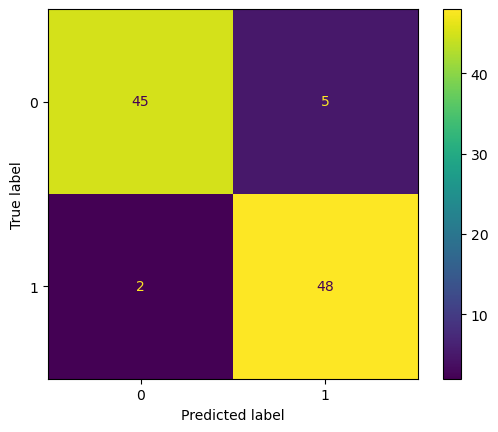

In [7]:
model = SVC(kernel='poly', degree=2)
model.fit(X,y)
y_pred = model.predict(X)
print("Accurracy: ", accuracy_score(y, y_pred))
print("F1 Score: ", f1_score(y, y_pred))
ConfusionMatrixDisplay.from_predictions(y, y_pred)

Accurracy:  0.93
F1 Score:  0.9333333333333333


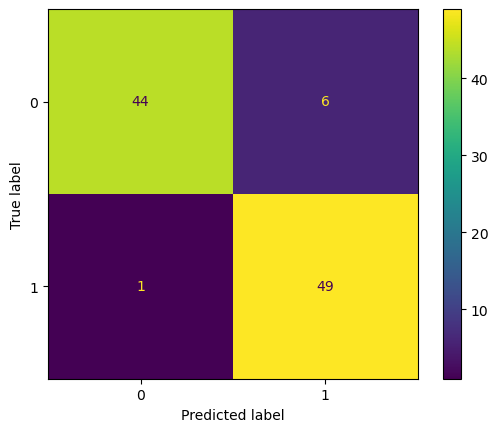

In [8]:
model = SVC(kernel='poly', degree=4)
model.fit(X,y)
y_pred = model.predict(X)
print("Accurracy: ", accuracy_score(y, y_pred))
print("F1 Score: ", f1_score(y, y_pred))
ConfusionMatrixDisplay.from_predictions(y, y_pred)

## 3. RBF

Accurracy:  0.93
F1 Score:  0.9306930693069307


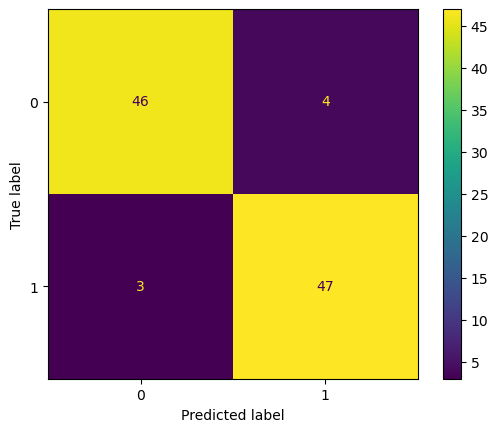

In [9]:
model = SVC(kernel='rbf', gamma=1)
model.fit(X,y)
y_pred = model.predict(X)
print("Accurracy: ", accuracy_score(y, y_pred))
print("F1 Score: ", f1_score(y, y_pred))
ConfusionMatrixDisplay.from_predictions(y, y_pred)

Accurracy:  0.99
F1 Score:  0.98989898989899


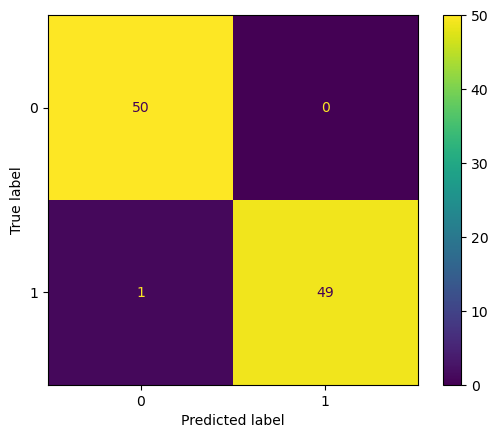

In [10]:
model = SVC(kernel='rbf', gamma=50)
model.fit(X,y)
y_pred = model.predict(X)
print("Accurracy: ", accuracy_score(y, y_pred))
print("F1 Score: ", f1_score(y, y_pred))
ConfusionMatrixDisplay.from_predictions(y, y_pred)